# Kingston Wind Weibull Distribution

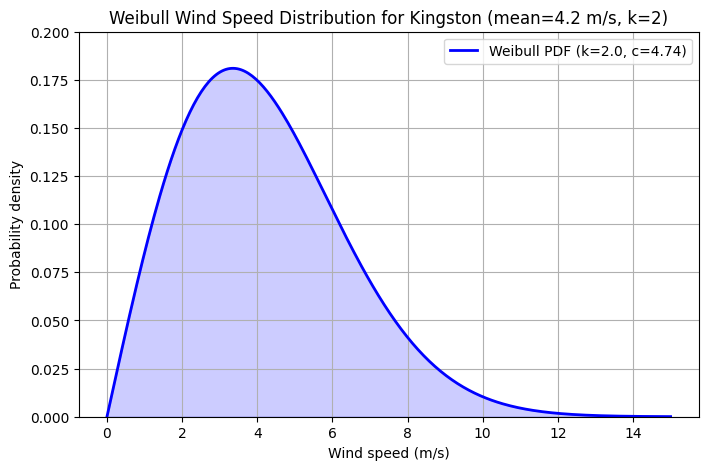

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.special import gamma

# Given parameters
mean_speed = 4.2   # m/s
k = 2.0            # shape factor

# Solve for scale parameter c so mean = 4.2
c = mean_speed / gamma(1 + 1/k)

# Wind speed range for plotting
v = np.linspace(0, 15, 300)  # 0 to 15 m/s
pdf = weibull_min.pdf(v, k, scale=c)

# Plot
plt.figure(figsize=(8,5))
plt.plot(v, pdf, 'b-', lw=2, label=f'Weibull PDF (k={k}, c={c:.2f})')
plt.fill_between(v, pdf, alpha=0.2, color='blue')

plt.title("Weibull Wind Speed Distribution for Kingston (mean=4.2 m/s, k=2)")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Probability density")
plt.ylim(0, 0.2)
plt.legend()
plt.grid(True)
plt.show()


In [2]:
def weibull_power(mean_speed, k, A, Cp, rho=1.225, eta_total=0.7):
    """
    Compute expected turbine power using Weibull-distributed winds.

    mean_speed : float
        Mean wind speed (m/s)
    k : float
        Weibull shape parameter
    A : float
        Rotor swept area (m^2)
    Cp : float
        Power coefficient (aero efficiency)
    rho : float, optional
        Air density (kg/m^3), default 1.225
    eta_total : float, optional
        Total mech+electrical efficiency (0â€“1), default 0.7

    Returns
    -------
    dict with c (scale), E_v3 (expected v^3),
    P_shaft (W), P_net (W), E_year (kWh)
    """
    # Scale parameter from mean wind speed
    c = mean_speed / gamma(1 + 1/k)

    # Expected cube of wind speed
    E_v3 = c**3 * gamma(1 + 3/k)

    # Average mechanical shaft power
    P_shaft = 0.5 * rho * A * Cp * E_v3

    # Net DC power after efficiencies
    P_net = P_shaft * eta_total

    # Annual energy (kWh)
    E_year = P_net * 8760 / 1000

    return {
        "c (scale)": c,
        "E[v^3]": E_v3,
        "P_shaft (W)": P_shaft,
        "P_net (W)": P_net,
        "E_year (kWh)": E_year
    }

# Example for Kingston:
results = weibull_power(
    mean_speed=4.2,  # m/s
    k=2.0,           # Rayleigh
    A=2.0,           # m^2 rotor area
    Cp=0.25,         # aerodynamic efficiency
    rho=1.225,
    eta_total=0.9    # combined mechanical + electrical
)

for key, val in results.items():
    print(f"{key}: {val:.2f}")

c (scale): 4.74
E[v^3]: 141.50
P_shaft (W): 43.33
P_net (W): 39.00
E_year (kWh): 341.64
